## `Section 03: Filtering Joins`


### 01-Performing an anti join

* Merge `employees` and `top_cust` with a left join, setting `indicator` argument to `True`. Save the result to `empl_cust`.




In [2]:
import pandas as pd 

with open("dataset/employees.csv", "rb") as f1, open("dataset/top_cust.csv", "rb") as f2:
    employees = pd.read_csv(f1) 
    top_cust = pd.read_csv(f2)


In [3]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on="srid", 
                            how="left", indicator=True)

empl_cust

,srid,lname,fname_x,title,email_x,cid,fname_y,\t\tlname,phone,fax,email_y,_merge
0,1,Adams,Andrew,General Manager 2002-08-14,andrew@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2,Edwards,Nancy,Sales Manager 2002-05-01,nancy@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3,Peacock,Jane,Sales Support Agent 2002-04-01,jane@chinookcorp.com,1.0,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,both
3,3,Peacock,Jane,Sales Support Agent 2002-04-01,jane@chinookcorp.com,3.0,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com,both
4,3,Peacock,Jane,Sales Support Agent 2002-04-01,jane@chinookcorp.com,12.0,Roberto,Almeida,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,both
...,...,...,...,...,...,...,...,...,...,...,...,...
59,5,Johnson,Steve,Sales Support Agent 2003-10-17,steve@chinookcorp.com,54.0,Steve,Murray,+44 0131 315 3300,NaN,steve.murray@yahoo.uk,both
60,5,Johnson,Steve,Sales Support Agent 2003-10-17,steve@chinookcorp.com,57.0,Luis,Rojas,+56 (0)2 635 4444,NaN,luisrojas@yahoo.cl,both
61,6,Mitchell,Michael,IT Manager 2003-10-17,michael@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
62,7,King,Robert,IT Staff 2004-01-02,robert@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only


* Select the `srid` column of `empl_cust` and the rows where `_merge` is `'left_only'`. Save the result to `srid_list`.


In [4]:
# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust["_merge"] == "left_only", 'srid']
srid_list

0     1
1     2
61    6
62    7
63    8
Name: srid, dtype: int64

* Subset the `employees` table and select those rows where the `srid` is in the variable `srid_list` and print the results.



In [5]:
# Get employees not working with top customers
print(employees[employees["srid"].isin(srid_list)])

   srid     lname    fname                       title  \
0     1     Adams   Andrew  General Manager 2002-08-14   
1     2   Edwards    Nancy    Sales Manager 2002-05-01   
5     6  Mitchell  Michael       IT Manager 2003-10-17   
6     7      King   Robert         IT Staff 2004-01-02   
7     8  Callahan    Laura         IT Staff 2004-03-04   

                     email  
0   andrew@chinookcorp.com  
1    nancy@chinookcorp.com  
5  michael@chinookcorp.com  
6   robert@chinookcorp.com  
7    laura@chinookcorp.com  


In [6]:
employees[employees["srid"].isin(srid_list)]

,srid,lname,fname,title,email
0,1,Adams,Andrew,General Manager 2002-08-14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager 2002-05-01,nancy@chinookcorp.com
5,6,Mitchell,Michael,IT Manager 2003-10-17,michael@chinookcorp.com
6,7,King,Robert,IT Staff 2004-01-02,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff 2004-03-04,laura@chinookcorp.com


### 02- Performing a semi join

* Merge `non_mus_tcks` and `top_invoices` on `tid` using an inner join. Save the result as `tracks_invoices`.
* Use `.isin()` to subset the rows of `non_mus_tck` where `tid` is in the `tid` column of `tracks_invoices`. Save the result as `top_tracks`.
* Group `top_tracks` by `gid` and count the `tid` rows. Save the result to `cnt_by_gid`.
* Merge `cnt_by_gid` with the `genres` table on `gid` and print the result.

In [7]:
with open("dataset/non_mus_tcks.csv", "rb" ) as f1, open("dataset/top_invoices.csv", "rb") as f2,\
     open("dataset/genres.csv", "rb" ) as f3: 

     non_mus_tcks = pd.read_csv(f1).set_index("index")
     top_invoices = pd.read_csv(f2).set_index("index")
     genres = pd.read_csv(f3)

In [8]:
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on="tid", how="inner")

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on="gid"))

   gid  tid      name
0   19    4  TV Shows
1   21    2     Drama
2   22    1    Comedy


### 03-Concatenation basics
* Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, in that order, setting `sort` to `True`.


In [9]:
with open("dataset/tracks_master.csv", "rb" ) as f1, open("dataset/tracks_ride.csv", "rb") as f2,\
     open("dataset/tracks_st.csv", "rb" ) as f3: 

     tracks_master = pd.read_csv(f1).set_index("index")
     tracks_ride = pd.read_csv(f2).set_index("index")
     tracks_st = pd.read_csv(f3).set_index("index")

In [10]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master,tracks_ride, tracks_st],
                               sort=True)
print(tracks_from_albums)

       aid             composer  gid  mtid                     name   tid  \
index                                                                       
0      152  J.Hetfield/L.Ulrich    3     1                  Battery  1853   
1      152            K.Hammett    3     1        Master Of Puppets  1854   
4      152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857   
0      154                  NaN    3     1     Fight Fire With Fire  1874   
1      154                  NaN    3     1       Ride The Lightning  1875   
2      154                  NaN    3     1  For Whom The Bell Tolls  1876   
3      154                  NaN    3     1            Fade To Black  1877   
4      154                  NaN    3     1        Trapped Under Ice  1878   
0      155                  NaN    3     1                  Frantic  1882   
1      155                  NaN    3     1                St. Anger  1883   
2      155                  NaN    3     1     Some Kind Of Monster  1884   

* Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, where the index goes from `0 to n-1`.


In [11]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                                ignore_index=True,
                               sort=True)
print(tracks_from_albums)

    aid             composer  gid  mtid                     name   tid  \
0   152  J.Hetfield/L.Ulrich    3     1                  Battery  1853   
1   152            K.Hammett    3     1        Master Of Puppets  1854   
2   152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857   
3   154                  NaN    3     1     Fight Fire With Fire  1874   
4   154                  NaN    3     1       Ride The Lightning  1875   
5   154                  NaN    3     1  For Whom The Bell Tolls  1876   
6   154                  NaN    3     1            Fade To Black  1877   
7   154                  NaN    3     1        Trapped Under Ice  1878   
8   155                  NaN    3     1                  Frantic  1882   
9   155                  NaN    3     1                St. Anger  1883   
10  155                  NaN    3     1     Some Kind Of Monster  1884   
11  155                  NaN    3     1             Dirty Window  1885   
12  155                  NaN    3     

* Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, showing only columns that are in all tables.

In [12]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               join='inner',
                               sort=True)
print(tracks_from_albums)

       aid  gid  mtid                     name   tid  u_price
index                                                        
0      152    3     1                  Battery  1853     0.99
1      152    3     1        Master Of Puppets  1854     0.99
4      152    3     1        Disposable Heroes  1857     0.99
0      154    3     1     Fight Fire With Fire  1874     0.99
1      154    3     1       Ride The Lightning  1875     0.99
2      154    3     1  For Whom The Bell Tolls  1876     0.99
3      154    3     1            Fade To Black  1877     0.99
4      154    3     1        Trapped Under Ice  1878     0.99
0      155    3     1                  Frantic  1882     0.99
1      155    3     1                St. Anger  1883     0.99
2      155    3     1     Some Kind Of Monster  1884     0.99
3      155    3     1             Dirty Window  1885     0.99
4      155    3     1            Invisible Kid  1886     0.99


### 04-Concatenating with keys

You have been given three tables with invoice data named `inv_jul`, `inv_aug`, and `inv_sep`. Concatenate these tables into one to create a graph of the average monthly invoice total.

* Concatenate the three tables together vertically in order with the oldest month first, adding `'7Jul'`, `'8Aug'`, and `'9Sep'` as keys for their respective months, and save to variable `avg_inv_by_month`.
* Use the `.agg()` method to find the average of the `total` column from the grouped invoices.
* Create a bar chart of `avg_inv_by_month`.

In [27]:
import matplotlib.pyplot as plt 

with open("dataset/inv_jul.csv", "rb") as f1, open("dataset/inv_aug.csv", "rb") as f2, open("dataset/inv_sep.csv", "rb") as f3:
    inv_jul = pd.read_csv(f1)
    inv_aug = pd.read_csv(f2)
    inv_sep = pd.read_csv(f3)


print(inv_jul.shape)
print(inv_aug.shape)
print(inv_sep.shape)

(35, 5)
(35, 5)
(33, 5)


In [28]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7Jul', '8Aug', '9Sep'])
inv_jul_thr_sep

iid  cid invoice_date  total       bill_ctry
7Jul 0    42   51     7/6/2009   1.98          Sweden
     1    43   53     7/6/2009   1.98              UK
     2    44   55     7/7/2009   3.96       Australia
     3    45   59     7/8/2009   5.94           India
     4    46    6    7/11/2009   8.91  Czech Republic
...      ...  ...          ...    ...             ...
9Sep 28  387   29     9/3/2013   3.96          Canada
     29  388   33     9/4/2013   5.94          Canada
     30  389   39     9/7/2013   8.91          France
     31  390   48    9/12/2013  13.86     Netherlands
     32  391    3    9/20/2013   0.99          Canada

[103 rows x 5 columns]

         total
7Jul  5.431429
8Aug  5.660000
9Sep  5.945455


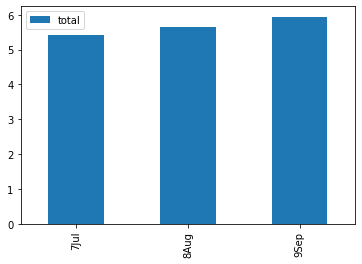

In [31]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7Jul', '8Aug', '9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})
print(avg_inv_by_month)

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind="bar")
plt.show()

### 05-Using the append method


* Use the `.append()` method to combine (in this order) `tracks_ride`, `tracks_master`, and `tracks_st` together vertically, and save to `metallica_tracks`.

* Merge `metallica_tracks` and `invoice_items` on `tid` with an inner join, and save to `tracks_invoices`.

* For each `tid` and `name` in `tracks_invoices`, sum the quantity sold column, and save as `tracks_sold`.
Sort `tracks_sold` in descending order by the `quantity` column, and print the table.

In [34]:
with open("dataset/invoice_items.csv", "rb") as f:
    invoice_items = pd.read_csv(f)

In [50]:
# Use the .append() method to combine the tracks tables
metallica_tracks = tracks_ride.append([tracks_master, tracks_st], sort=False)

# Merge metallica_tracks and invoice_items
tracks_invoices = metallica_tracks.merge(invoice_items, on='tid', how='inner')

# For each tid and name sum the quantity sold
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({'quantity':'sum'})

# Sort in decending order by quantity and print the results
print(tracks_sold.sort_values('quantity', ascending=False))

                              quantity
tid  name                             
1853 Battery                         2
1876 For Whom The Bell Tolls         2
1854 Master Of Puppets               1
1857 Disposable Heroes               1
1875 Ride The Lightning              1
1877 Fade To Black                   1
1882 Frantic                         1
1884 Some Kind Of Monster            1
1886 Invisible Kid                   1


### 06- Concatenate and merge to find common songs

* Concatenate the `classic_18` and `classic_19` tables vertically where the index goes from 0 to n-1, and save to `classic_18_19`.


In [52]:
with open("dataset/classic_18.csv", "rb") as f1, open("dataset/classic_19.csv", "rb") as f2:
    classic_18 = pd.read_csv(f1)
    classic_19 = pd.read_csv(f2)

In [55]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18,classic_19], ignore_index=True, verify_integrity=False)

* Concatenate the `pop_18` and `pop_19` tables vertically where the index goes from 0 to n-1, and save to `pop_18_19`.


In [53]:
with open("dataset/pop_18.csv", "rb") as f1, open("dataset/pop_19.csv", "rb") as f2:
    pop_18 = pd.read_csv(f1)
    pop_19 = pd.read_csv(f2)

In [54]:
# Concatenate the pop tables vertically
pop_18_19 =  pd.concat([pop_18,pop_19], ignore_index=True, verify_integrity=False)

* With `classic_18_19` on the left, merge it with `pop_18_19` on `tid` using an inner join.
* Use `.isin()` to filter `classic_18_19` where `tid` is in `classic_pop`.

In [56]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on="tid", how='inner')

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19["tid"].isin(classic_pop["tid"])]

# Print popular chart
print(popular_classic)

    Unnamed: 0  pid   tid
3         8523   12  3479
10        8557   12  3439
21        8563   12  3445
23        8567   12  3449
48        8555   12  3437
50        8553   12  3435


==================================
### `The End`
==================================